# DSCI-Data Wrangling Final Report
The goal of this final project is to take a look at the change in music sales over nearly half a century. Although the first section touchs on sales globally by format, the majority of this report focuses solely on the US, it's music artists and their respective sales and genres. 

Link to GitHub Repo: https://github.com/BiggBenDesign/DSCIFinal

The purpose of this report is to answer these proposed questions:

**1) How has gross sales changed over the years with respect to the growing portion of digital sales**

**2) What shifts in medium outside of digital (ex. CD, cassette, vinyl) occurred before the advent of the internet**

**3) What genres have been created and what, if any, have seen dramatic drop-off/cessation** 

**4) How have the sales of each genre shifted with the times and introduction of social media**

**5) What were the most popular genres for each year and their respective sales**

**6) What were the most popular artists for each year and their respective sales**

**7) Adjusting for inflation, what are the gross differences in revenue generated by genre (and possibly artist)** 



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After importing the necessary tools, it's on to the datasets. The main dataset that allows for a look at much of the historical data is the Billboard Top 100 from 1958 to 2021. For the looks into genre shifts, the artistBreak I used the set from the "CORGIS Datasets Project" (https://corgis-edu.github.io/corgis/csv/music/). 

In [104]:
# Once drive has been mounted, read_csv just needs the filepath from you Google Drive where the csv is located, staring from /content/drive/MyDrive/
# Used for Artist Popularity from 1958-2021
bbTop100 = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/billboardTop100From1958/charts.csv")

# Used for Artist-Genre connection
artistsInfo = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/artistsBreakdown/music.csv")

# Used for quick look at Sales by Medium from 1973-2019
salesByMedium = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/musicByMediumFrom1973/musicdata.csv")

# Used for look into Grammy Data and Aggregate Sales of key Artists
grammyBestRecord = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/greatestGrammy/grammys-best record.csv")
grammyBestAlbum = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/greatestGrammy/grammys-best album.csv")
grammyBestArtist = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/greatestGrammy/best artists_RS.csv")
grammyMoneyMaker = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/greatestGrammy/money-makers-bb.csv")
grammyRichestArtistByYear = pd.read_csv("/content/drive/MyDrive/CSU/DSCI235-DataWrangling/Final/greatestGrammy/richest musicians by year.csv")

# Sales by Format (1979 - 2019)
Let's take a quick look at sales data of music mediums. This dataset spans **1973 - 2019** and gives us an especially good look at the rise and fall of physical mediums leading up to the move to digital. 

First I plot each format individually on the same time scale so that we can have a closer look at each. After that, I aggregate all formats together for a look at all of their sales for each year. Visually we also get a peak into each's market value every year that it had sales.

<ipython-input-105-b9d2cad80dd1>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5))


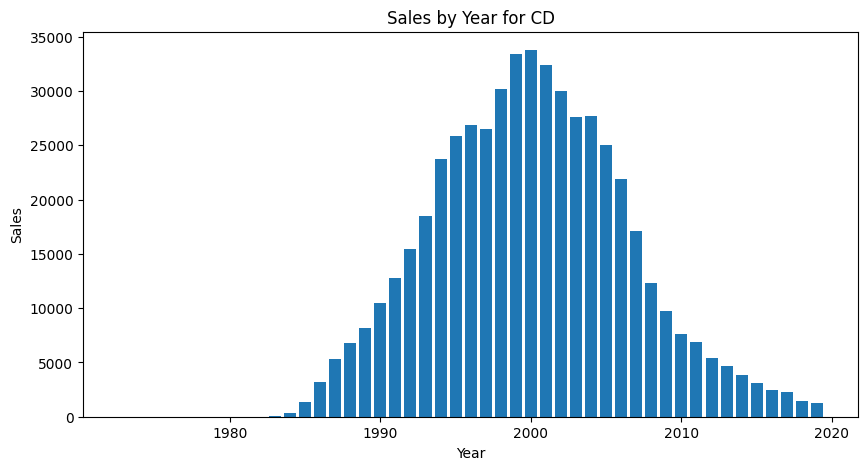

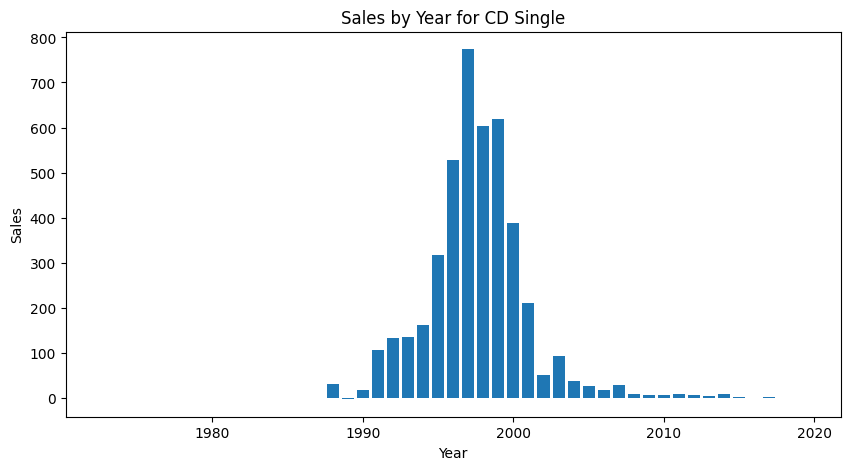

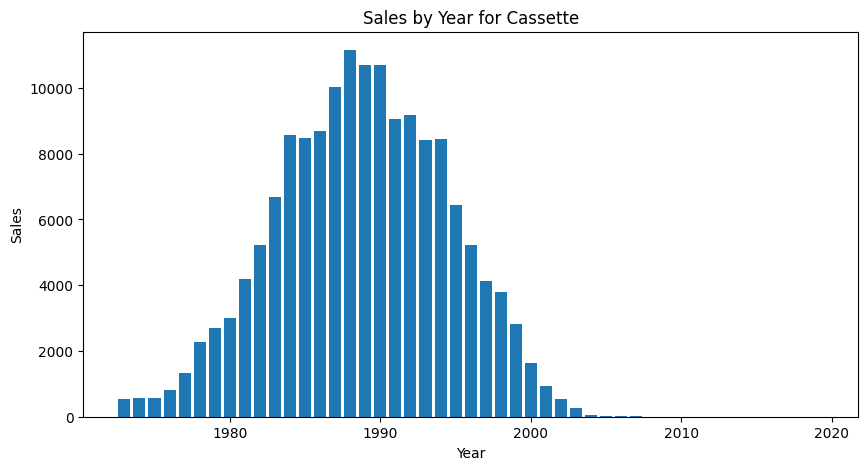

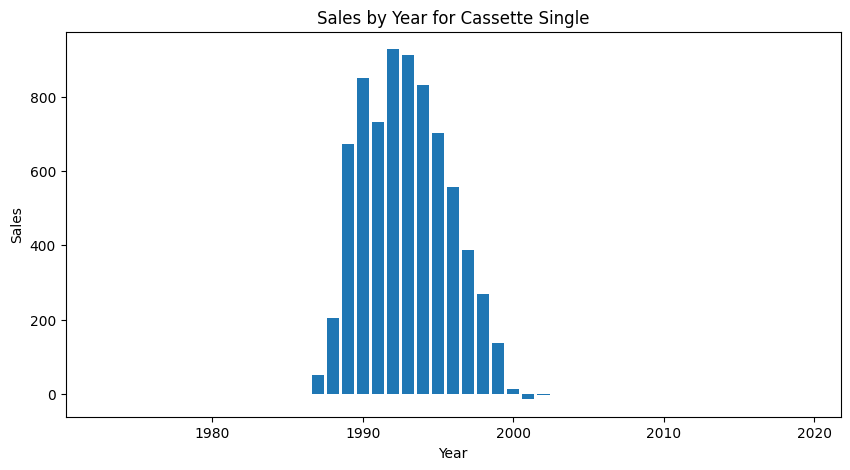

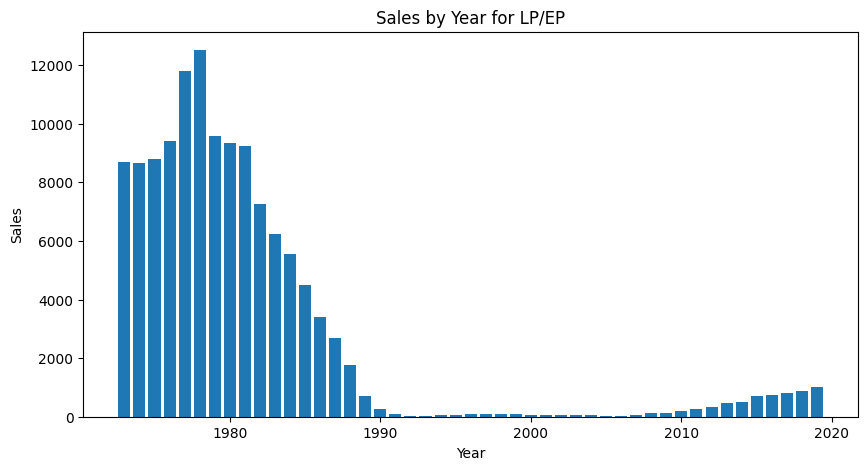

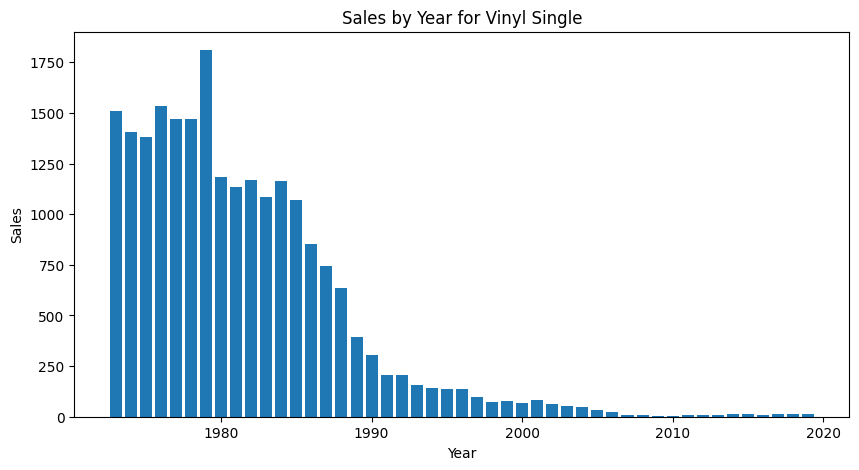

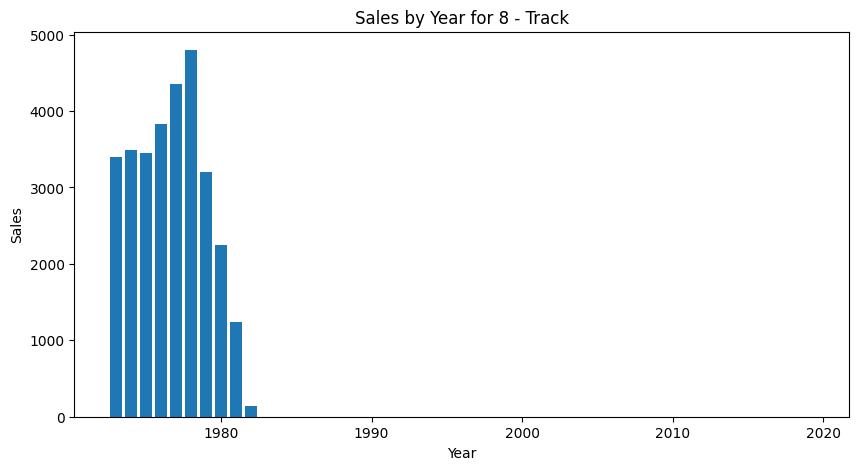

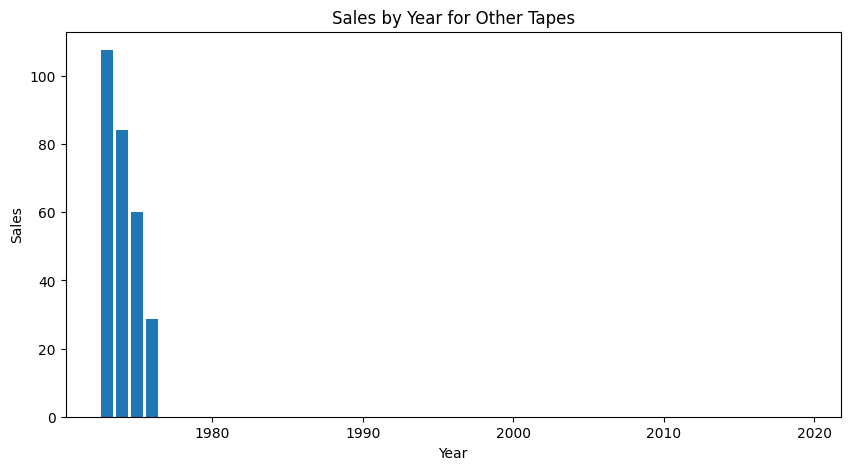

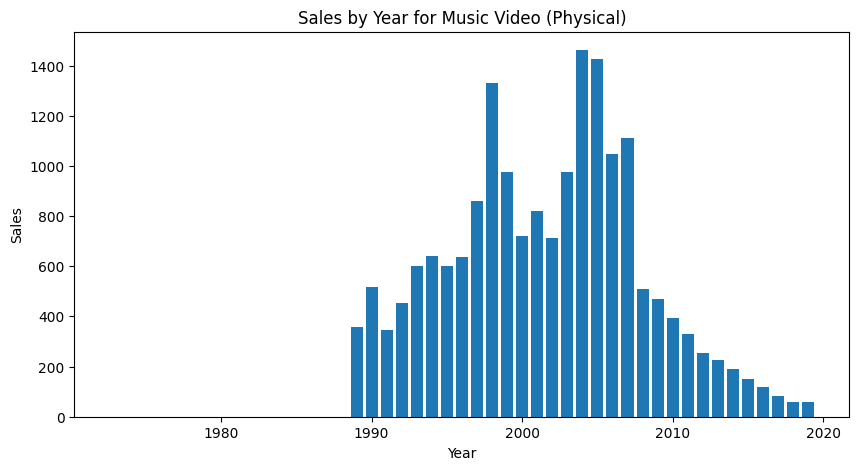

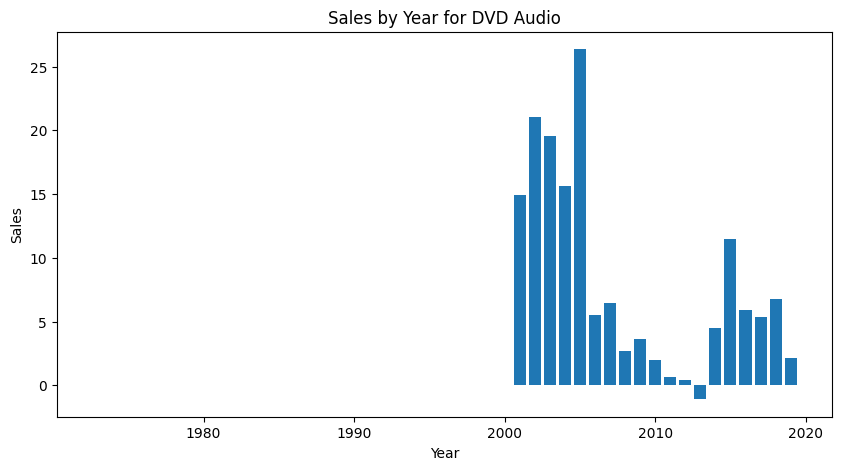

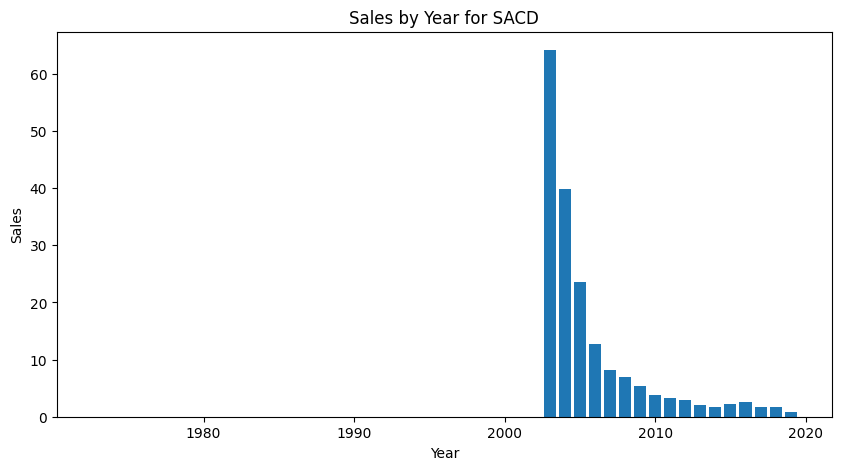

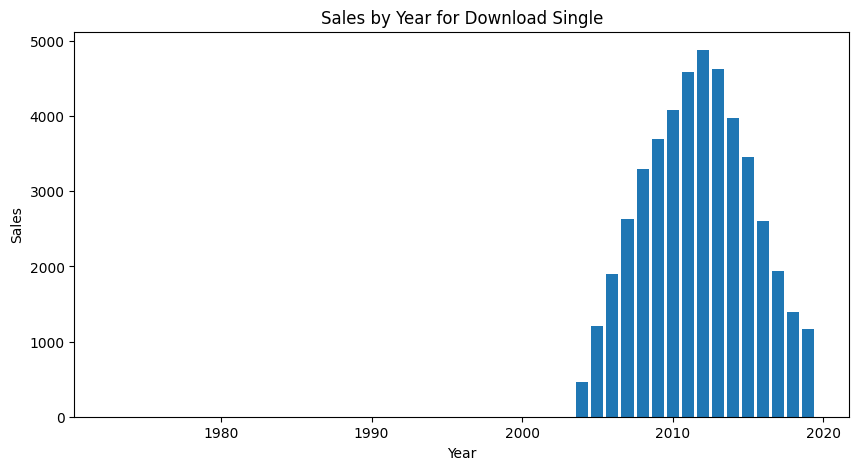

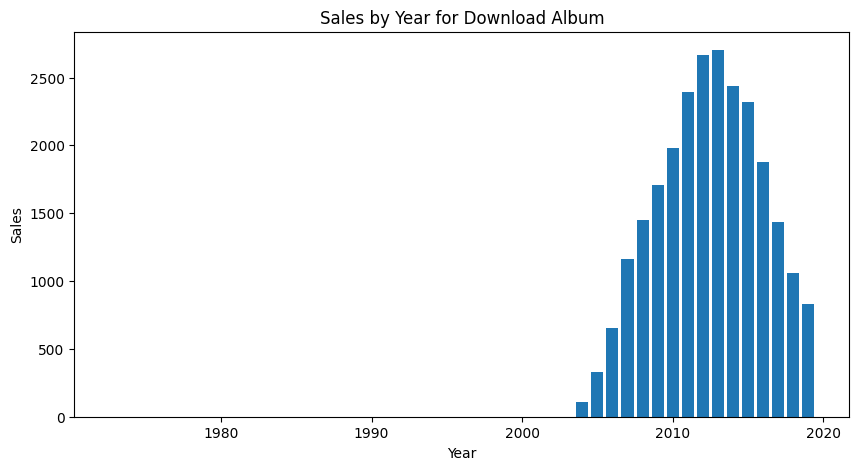

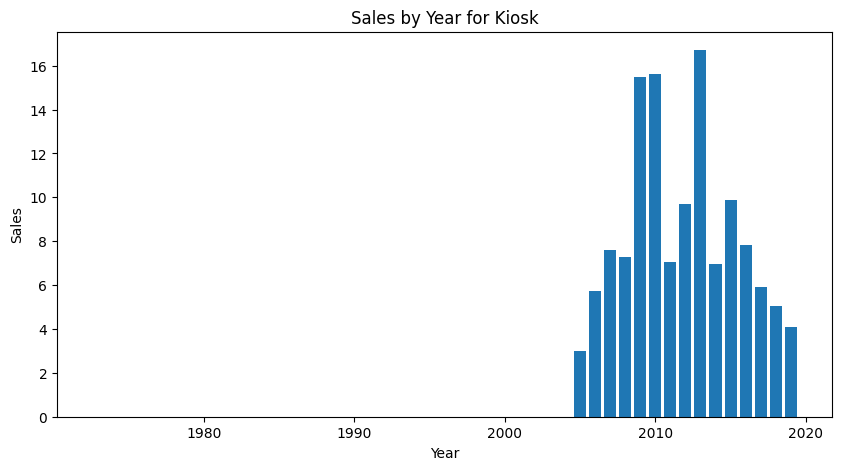

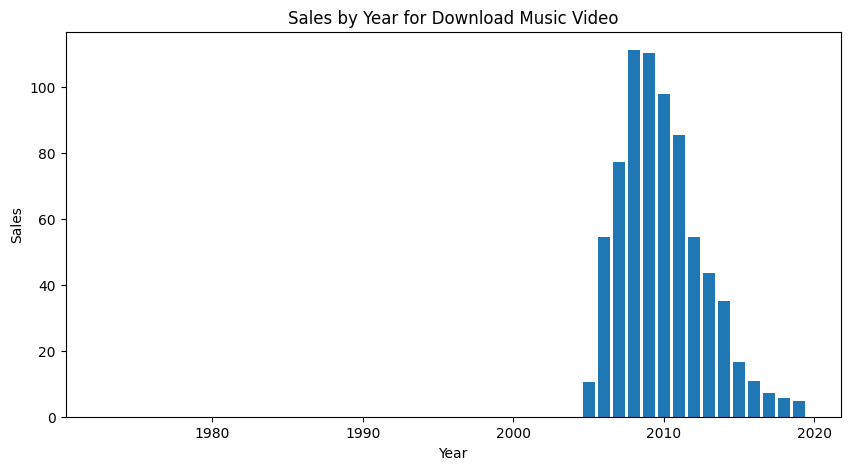

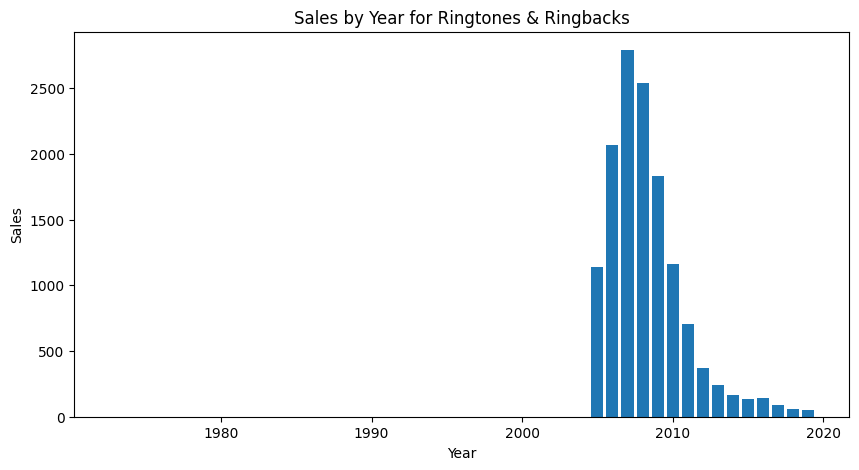

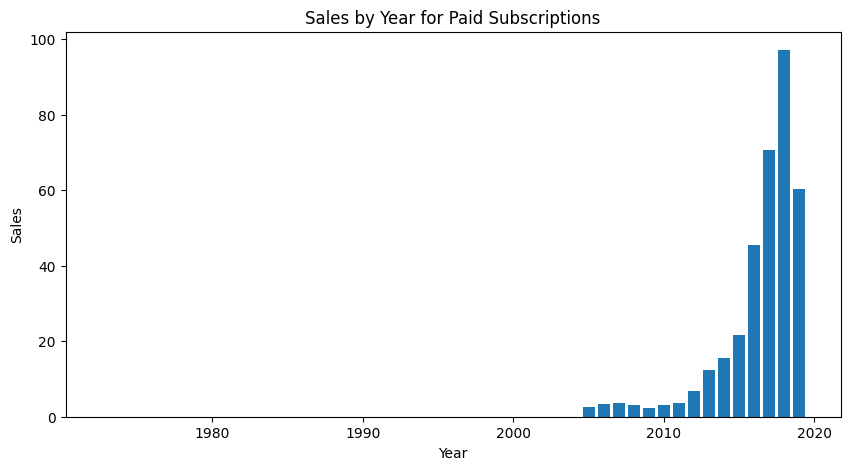

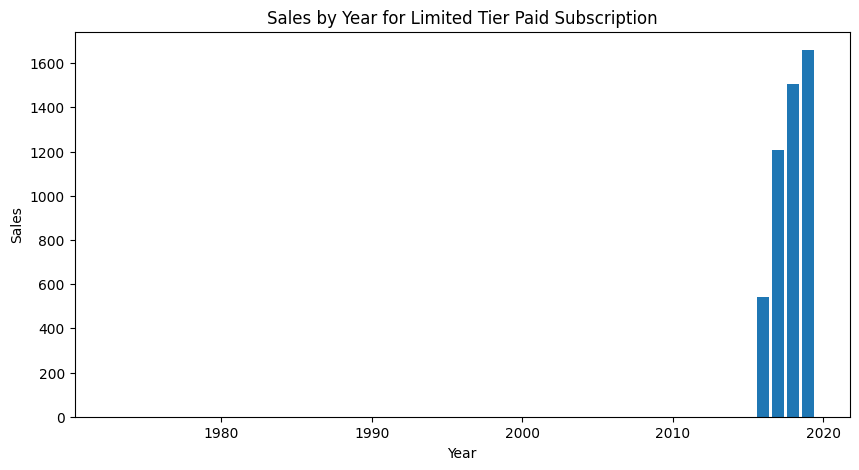

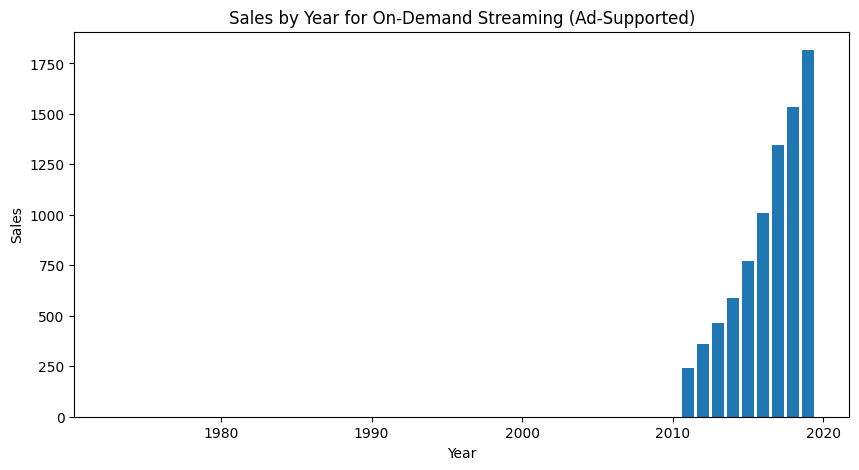

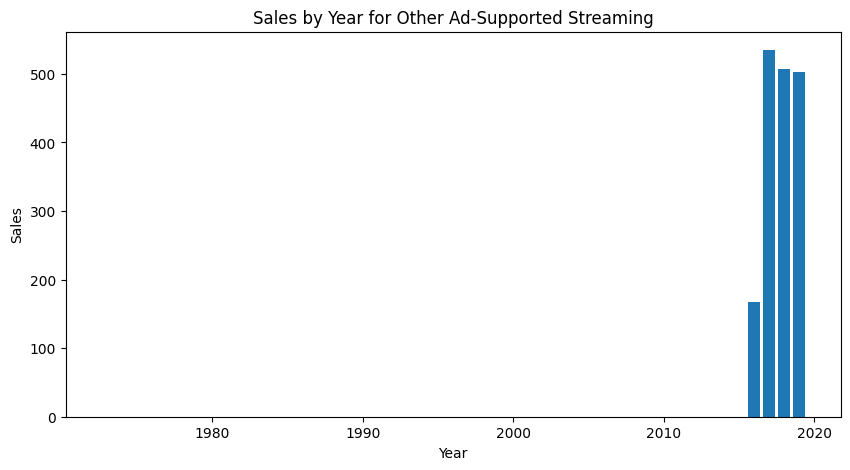

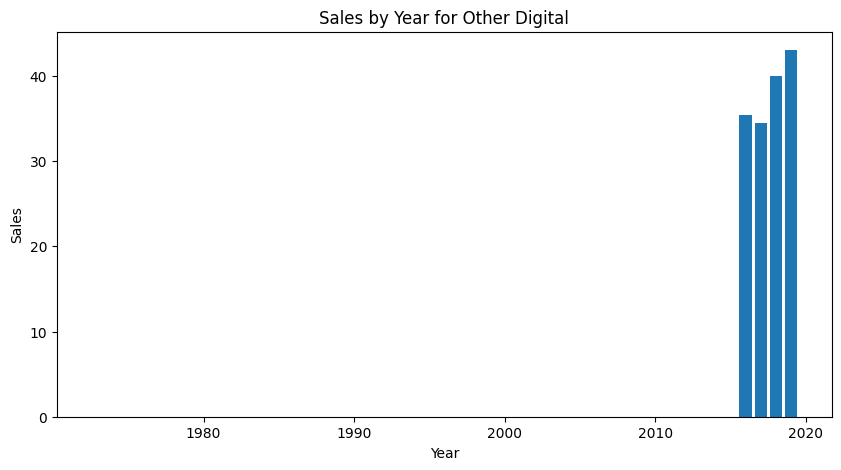

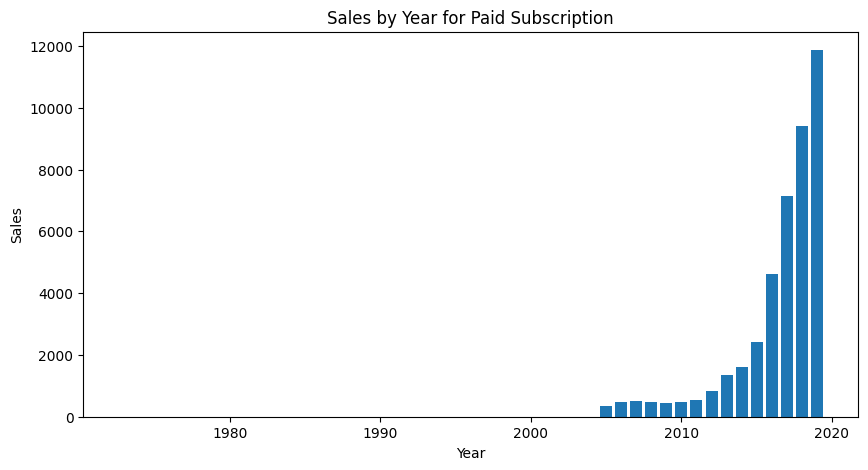

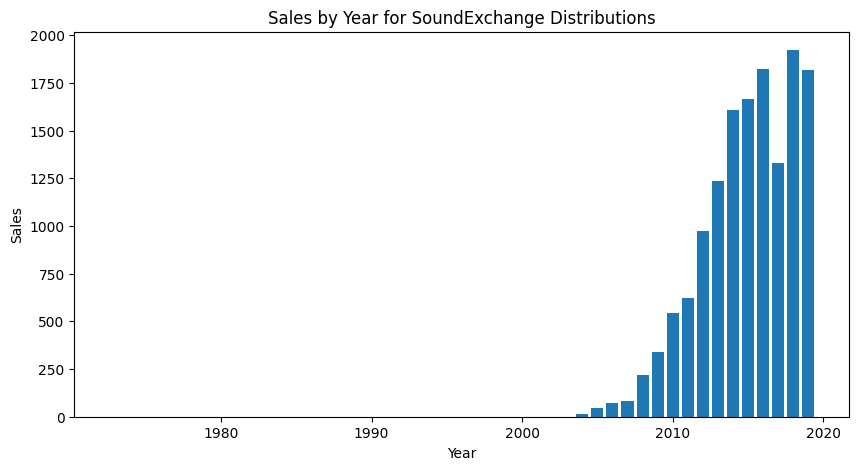

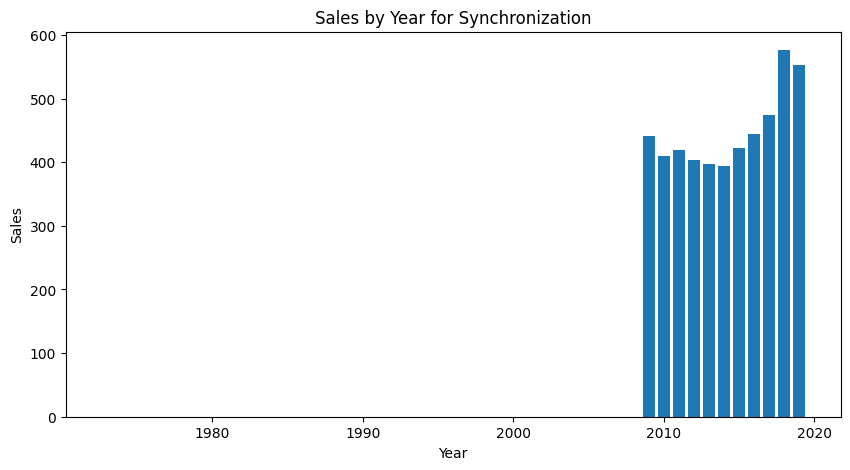

In [105]:
#metric_counts = salesByMedium['metric'].value_counts()
#format_counts = salesByMedium['format'].value_counts()

formats = salesByMedium['format'].unique()
plotList = []

for format in formats:
  salesByFormat = salesByMedium[salesByMedium['format'] == format]
  salesByYearAndFormat = salesByFormat.groupby(['year'])['value_actual'].sum().reset_index()
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.bar(salesByYearAndFormat['year'], salesByYearAndFormat['value_actual'], label=format)
  ax.set_title('Sales by Year for ' + format)
  ax.set_xlabel('Year')
  ax.set_ylabel('Sales')
  plotList.append(ax)
  
plt.show()

Now that we have looked at each format individually we can take a peek at their aggregate sales every year with respect to each other. As stated, altough not specifically what I am graphing, we do get a peek into the market share that each format has in each of it's years. 

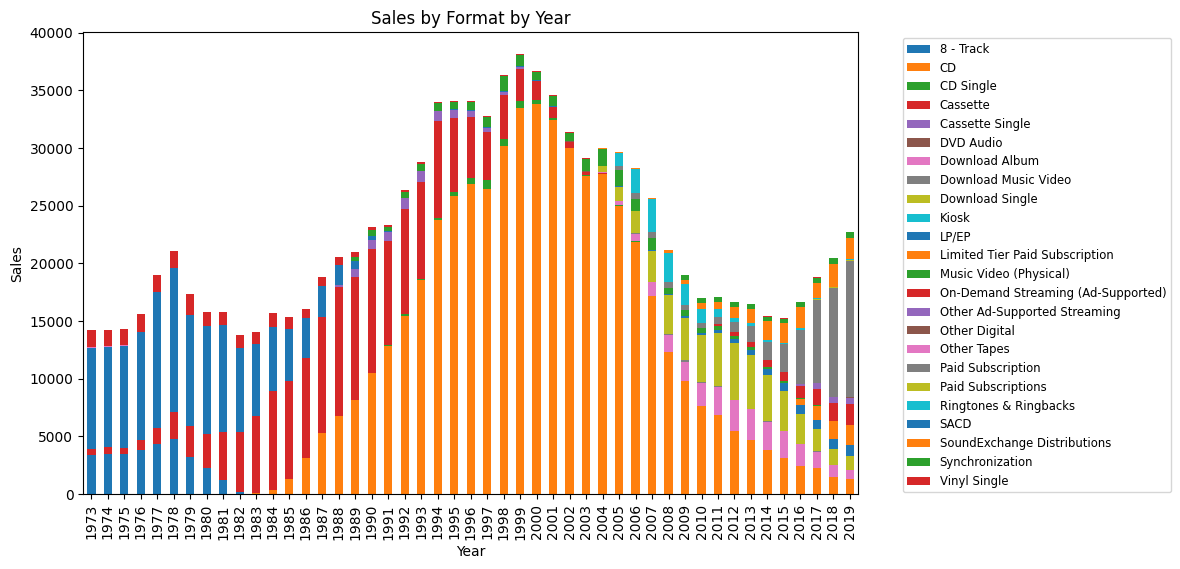

In [106]:
salesByYearAndFormat = salesByMedium.groupby(['year', 'format'])['value_actual'].sum().reset_index()
salesByYearAndFormatPivot = salesByYearAndFormat.pivot_table(index='year', columns='format', values='value_actual')
ax = salesByYearAndFormatPivot.plot(kind='bar', figsize=(10,6), stacked=True, title="Sales by Format by Year")
ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
plt.show()

# Billboard Top 100 (1958 - 2021)
In this section I go about munipulating the **Billboard Top 100** dataset independently. The dataset reaches back all the way to **1958** and so can allow us an in depth look at the popularity of artists over that time. 

**Caveat:** The **Billboard Top 100** dataset gives us **+10k individual artists**. This dataset does make a distinction between a song made by a single artist and one that they are featured on or have a feature. With more time and focus on this dataset specifically I could filter and group them with their individual artist's sales but for now we will just treat each unique **'artist'** values in the dataset as a different artist.

*To* clean up the dataset and prep it for a merge later on, I filtered out duplicate song entries, keeping the first entry 

In [108]:
#Drop duplicate song entries, keep row with max 'weeks-on-board'
bbTop100 =  bbTop100.drop_duplicates(subset=['artist','song'], keep='first')#.sort_values(by='weeks-on-board', ascending=False)

# Need to aggregate total weeks for each artist ----> put in 'artistTotalWOB'
artistWOB = bbTop100.groupby(['artist'])['weeks-on-board'].sum()
artistWOB = artistWOB.fillna(0)
bbTop100['artistTotalWOB'] = bbTop100['artist'].map(artistWOB)

bbTop100.set_index(['artist'])

,date,rank,song,last-week,peak-rank,weeks-on-board,artistTotalWOB
artist,,,,,,,
Adele,2021-11-06,1,Easy On Me,1.0,1,3,304
The Kid LAROI & Justin Bieber,2021-11-06,2,Stay,2.0,1,16,16
Lil Nas X & Jack Harlow,2021-11-06,3,Industry Baby,3.0,1,14,14
Walker Hayes,2021-11-06,4,Fancy Like,4.0,3,19,38
Ed Sheeran,2021-11-06,5,Bad Habits,5.0,2,18,399
...,...,...,...,...,...,...,...
The Ames Brothers,1958-08-04,90,Stay,NaN,90,1,53
Thurston Harris,1958-08-04,96,Over And Over,NaN,96,1,1
The Ames Brothers,1958-08-04,98,Little Serenade,NaN,98,1,53


Text(0.5, 1.0, 'Top 50 Most Popular Artists')

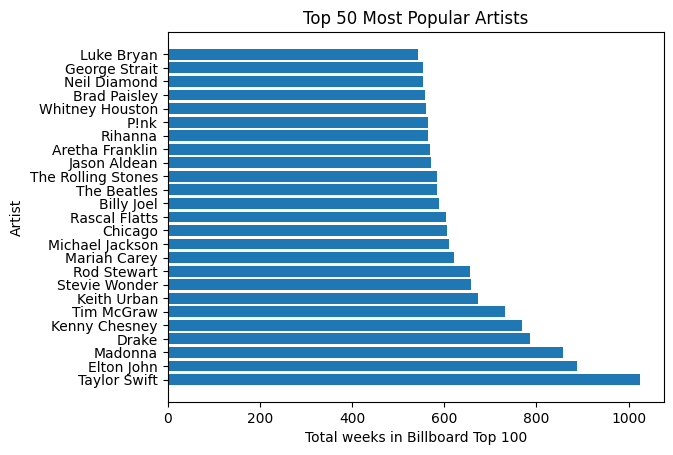

In [109]:
# By looking at the total number of weeks an artist was on the Billboard Top 100
# we can chart things like the top 50 most popular artists over that time interval
top25PopularArtists = bbTop100.drop_duplicates(subset=(['artist', 'artistTotalWOB'])).sort_values('artistTotalWOB', ascending=False).head(25)
plt.barh(y=top25PopularArtists['artist'].values, width=top25PopularArtists['artistTotalWOB'].values)
plt.xlabel('Total weeks in Billboard Top 100')
plt.ylabel('Artist')
plt.title('Top 50 Most Popular Artists')
#top50PopularArtists


#top50PopularArtists['artistTotalWOB'].head(20).values
#top50PopularArtists.plot(kind='bar', figsize=(15,5), title='Top 50 Most Popular Artists 1958-2021')

# Artists and their Genres
In this section I go over the **COGIS** dataset which allows a look into artists and their **'associated terms'** (genre). For purposes of this project I will only by utilizing the 'artist.name' and 'artist.terms' columns.

**Large Caveat:** Due to the subjectivity of music, many artists map to many different genres and so locking them to one does negate some of the pure data. Unfortunately this is required to get any real look into genre. In my filtering process I grab the last word from every **'artist.terms'** cell and take that as the overarching genre and then group again by that new value. 

In [110]:
#Remove dupelicate entries for artist's name and drop any entires without 'artist.terms' tag
artistsInfo.dropna(subset=['artist.terms'], inplace=True)
artistsInfo.drop_duplicates(subset=['artist.name'], inplace=True)

#We really only need the artist's name and their genre tags
artistsInfo = artistsInfo[['artist.name','artist.terms']]

#We are left with just over 4k individual artists
artistsInfo

,artist.name,artist.terms
0,Casual,hip hop
1,The Box Tops,blue-eyed soul
2,Sonora Santanera,salsa
3,Adam Ant,pop rock
4,Gob,pop punk
...,...,...
9977,Winterlight,shoegaze
9980,Daara J,afrobeat
9986,Kaskaad,dubstep
9987,Chantal Chamandy,dance pop


In [111]:
renamedTerms = artistsInfo['artist.terms'].apply(lambda x: x.split()[-1] if len(x.split()) > 1 else '' if x == '' else x)

for term in renamedTerms.drop_duplicates().values:
  mask = artistsInfo['artist.terms'].str.contains(term)
  artistsInfo.loc[mask, 'term group'] = term

artistsInfo

,artist.name,artist.terms,term group
0,Casual,hip hop,hop
1,The Box Tops,blue-eyed soul,soul
2,Sonora Santanera,salsa,salsa
3,Adam Ant,pop rock,pop
4,Gob,pop punk,pop
...,...,...,...
9977,Winterlight,shoegaze,shoegaze
9980,Daara J,afrobeat,afrobeat
9986,Kaskaad,dubstep,dub
9987,Chantal Chamandy,dance pop,dance


In [112]:
artistsInfo.drop_duplicates(subset=('artist.name'), inplace=True)

# The Great Merge
Now that we have looked at the Billboard Top 100 dataset independently of artist genre tags, and then extracted the artists and genres from the COGIS dataset, we can go about adding those tags in and then looking into genre popularity. 


Text(0.5, 1.0, 'Most Popular Music Genres of The Billboard Top 100')

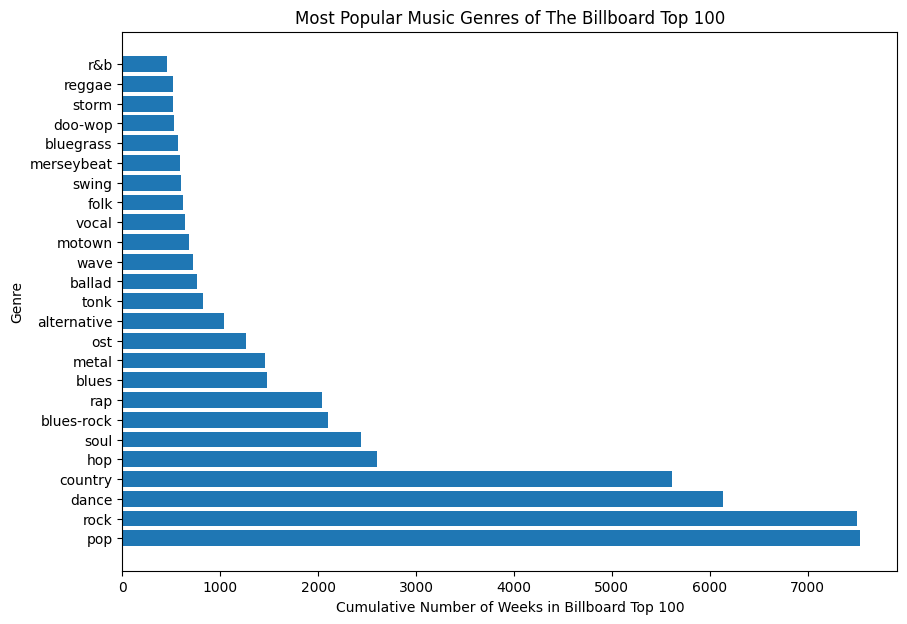

In [113]:
# Merge the two dataframes and then go about dropping duplicates and filing values for weeks-on-board
artistNameAndWeeksOnBB = bbTop100[['artist','weeks-on-board','date','artistTotalWOB']]
mergedDF = pd.merge(artistNameAndWeeksOnBB, artistsInfo, left_on='artist', right_on='artist.name', how='outer')

# Aggregate all artist names into one column
mergedDF['finalArtistName'] = mergedDF['artist'].fillna(mergedDF['artist.name'])
mergedDF.drop(columns=['artist','artist.name'], inplace=True)

# Drop any rows that we cant look at genre on
#mergedDF.dropna(subset=['artist.terms'], inplace=True)

# Drop duplicate names, keeping the last week so we can still look at time later
mergedDF.drop_duplicates(subset=['finalArtistName'], keep='first', inplace=True)
mergedDF['weeks-on-board'] = mergedDF['weeks-on-board'].fillna(0)
mergedDF['artistTotalWOB'] = mergedDF['artistTotalWOB'].fillna(0)

# Now we can grab the top genres
plt.figure(figsize=(10,7))
plt.barh(y=(mergedDF.groupby('term group')['artistTotalWOB'].sum().sort_values(ascending=False).head(25).index), width=(mergedDF.groupby('term group')['artistTotalWOB'].sum().sort_values(ascending=False).head(25)), )
plt.xlabel('Cumulative Number of Weeks in Billboard Top 100')
plt.ylabel('Genre')
plt.title('Most Popular Music Genres of The Billboard Top 100')

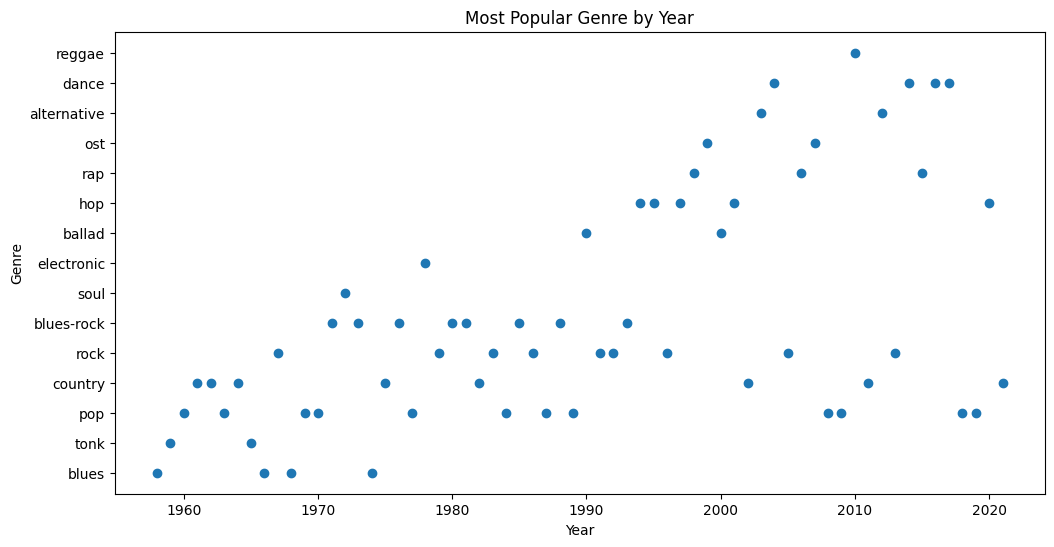

In [114]:
# Convert date column to datetime format
mergedDF['date'] = pd.to_datetime(mergedDF['date'])

# Group by year and genre, and count the frequency
grouped = mergedDF.groupby([mergedDF['date'].dt.year, 'term group']).size()

# Get the most frequent genre for each year
top_genre = grouped.groupby(level=0).idxmax()

# Create a new DataFrame with year and most frequent genre
df_top_genre = pd.DataFrame(top_genre.values.tolist(), columns=['year', 'term group'])
df_top_genre.set_index('year', inplace=True)

plt.figure(figsize=(12,6))
# Plot a scatter chart with year on the x-axis and genre on the y-axis
plt.scatter(df_top_genre.index, df_top_genre['term group'])

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Most Popular Genre by Year')

plt.show()

In [115]:
# Convert date column to datetime format
mergedDF['date'] = pd.to_datetime(mergedDF['date'])

# Group by year and term group, and count the frequency
grouped = mergedDF.groupby([mergedDF['date'].dt.year, 'term group'])['term group'].count()
groupedDF = grouped.reset_index(name='count')
groupedDF.set_index('date')

# Grab the most frequent genre for every year if possible
idx = groupedDF.groupby(['date'])['count'].idxmax()
maxCountEveryYear = groupedDF.loc[idx]
maxCountEveryYear.set_index('date', inplace=True)
maxCountEveryYear['term group']

# Same representation as above but made as a Series obj

date
1958.0      blues
1959.0       tonk
1960.0        pop
1961.0    country
1962.0    country
           ...   
2017.0      dance
2018.0        pop
2019.0        pop
2020.0        hop
2021.0    country
Name: term group, Length: 64, dtype: object

# Grammy Dataset
In this section, I will go over the handfull of data sets that pertain to the **Grammys**. Using these datasets allow us to answer some of the more interesting questions that I had going into this project, such as: **Who was the highest selling artist each year and how much did they make?**

As well, towards the end, I'll merge the dataset and then we can look at what **genre term** is associated with each **Artist of the Year** and find out the cultural shift in genre taste for the US.

In [116]:
#grammyBestRecord
grammyBestAlbum
#grammyRichestArtistByYear

,Year,Artist,Work,City/town of birth/origin,US State of birth/origin,Country of birth/origin,Racial/Ethnic group
0,1959.0,Henry Mancini,The Music from Peter Gunn,Cleveland,Ohio,USA,White/European
1,1960.0,Frank Sinatra,Come Dance with Me!,Hoboken,New Jersey,USA,White/European
2,1961.0,Bob Newhart,The Button-Down Mind of Bob Newhart,Oak Park,Illinois,USA,White/European
3,1962.0,Judy Garland,Judy at Carnegie Hall,Grand Rapids,Minnesota,USA,White/European
4,1963.0,Vaughn Meader,The First Family,Waterville,Maine,USA,White/European
...,...,...,...,...,...,...,...
58,2014.0,Daft Punk,Random Access Memories,Paris,NaN,France,White/European
59,2015.0,Beck,Morning Phase,Los Angeles,California,USA,White/European
60,2016.0,Taylor Swift,1989,Reading,Pennsylvania,USA,White/European
61,2017.0,Adele,25,London,NaN,UK,White/European


As a quick exercise we can take the top selling artists for each year and plot them. We'll also do this with the gross adjusted amount for a comparison between each of them.

Text(0, 0.5, 'Year')

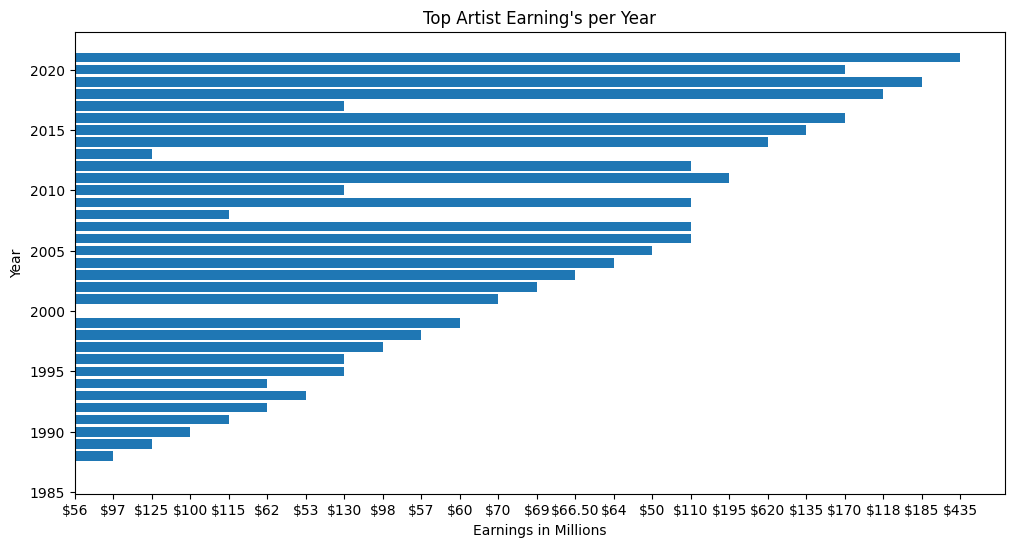

In [117]:
plt.figure(figsize=(12,6))
plt.barh(y=grammyRichestArtistByYear['Year'], width=grammyRichestArtistByYear['Earnings (Millions)'])
plt.title('Top Artist Earning\'s per Year')
plt.xlabel('Earnings in Millions')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

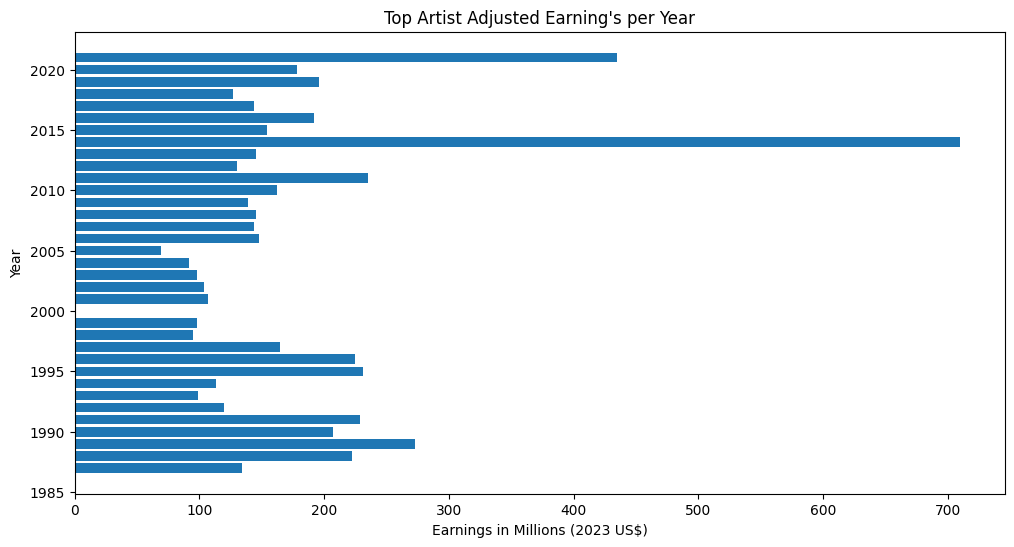

In [118]:
plt.figure(figsize=(12,6))
plt.barh(y=grammyRichestArtistByYear['Year'], width=grammyRichestArtistByYear['Adjusted earnings\n(in 2023 dollar)'])
plt.title('Top Artist Adjusted Earning\'s per Year')
plt.xlabel('Earnings in Millions (2023 US$)')
plt.ylabel('Year')

Using this dataset we can find out the average (in 2023 adjusted US Dollar) of what each Top Artist for the Year took home! 

P.S.: Remeber that it is in Millions!

In [119]:
grammyRichestArtistByYear['Adjusted earnings\n(in 2023 dollar)'].mean()

178.38235294117646

We also have access to a dataset that gives us the Top Album for each year 1959-2016. Using this we can quickly see if there are any descrepensies between the Top Artists and Top Albums for each year.

In [120]:
#grammyBestAlbum
mergedGrammy = pd.merge(left=grammyBestArtist, right=grammyBestAlbum, left_on='Artist', right_on='Artist', how='inner')

# Through this merge, we can see that the Top Artist for each year does not necessarily correlate to the Top Album
mergedGrammy.sort_values(by='Year')

,Rolling Stone Magazine Rank,Artist,Racial/Ethnic group_x,Main Grammy awards,Main Grammy Nominations,Total Awards,Total Nominations,UK number 1's,Year,Work,City/town of birth/origin,US State of birth/origin,Country of birth/origin,Racial/Ethnic group_y
0,1,The Beatles,White/European,2,10,14,29,17,1968.0,Sgt. Pepper's Lonely Hearts Club Band,Liverpool,NaN,UK,White/European
10,40,Simon & Garfunkel,White/European,3,4,7,11,1,1971.0,Bridge over Troubled Water,New York City,New York,USA,White/European
3,15,Stevie Wonder,Black/African,3,8,25,74,2,1974.0,Innervisions,Saginaw,Michigan,USA,Black/African
4,15,Stevie Wonder,Black/African,3,8,25,74,2,1975.0,Fulfillingness' First Finale,Saginaw,Michigan,USA,Black/African
5,15,Stevie Wonder,Black/African,3,8,25,74,2,1977.0,Songs in the Key of Life,Saginaw,Michigan,USA,Black/African
9,38,John Lennon,White/European,1,2,1,4,3,1982.0,Double Fantasy,Liverpool,NaN,UK,White/European
8,35,Michael Jackson,Black/African,3,8,13,38,7,1984.0,Thriller,Gary,Indiana,USA,Black/African
6,22,U2,White/European,6,11,22,46,7,1988.0,The Joshua Tree,Dublin,NaN,Ireland,White/European
11,55,Eric Clapton,White/European,5,6,17,37,0,1993.0,Unplugged,Ripley,NaN,UK,White/European
1,2,Bob Dylan,White/European,1,4,10,38,1,1998.0,Time Out of Mind,Duluth,Minnesota,USA,White/European


As a note based on the above merged dataframe, we can see that not a single entry after 2006 saw the Artist of the Year release the Album of the Year. Looking into the graphs from the beginning of this book, we can see that this coincides with the rise in digital sales and subscriptions.

Focusing on Top Album for each Year, we can associate terms from earlier and look at some of the most common terms to emerge year after year.

In [121]:
# We only need valid entries with a year and then just need to know the artist and the work
grammyBestAlbum.dropna(subset='Year', inplace=True)
grammyBestAlbum = grammyBestAlbum[['Year','Artist','Work']]

# We can bring in the dataset from earlier that had the genre terms associated with artists
bestAlbumWTerm = pd.merge(left=grammyBestAlbum, right=artistsInfo, left_on='Artist', right_on='artist.name')

# No we can look at the most popular album, it's artist's name, and finally the genre
bestAlbumWTerm

# This also allows us to chart how many times, if any, a single genre term pops up year after year
bestAlbumWTerm['term group'].value_counts()

country              3
rock                 3
nova                 3
singer-songwriter    2
blues-rock           2
dance                2
pop                  1
vocal                1
bluegrass            1
blues                1
rap                  1
motown               1
storm                1
folk                 1
merseybeat           1
comedy               1
tech                 1
Name: term group, dtype: int64

We can do this same thing with Artist of the Year and then compare each

In [122]:
# Only losing 8 entries
topSellingArtistWTerm = pd.merge(left=grammyRichestArtistByYear, right=artistsInfo, left_on='Musician', right_on='artist.name')


# Can once again look at the number of times a term pops up
topSellingArtistWTerm['term group'].value_counts()

dance         8
rock          4
merseybeat    4
blues         3
country       2
motown        1
metal         1
pop           1
wave          1
hop           1
Name: term group, dtype: int64

# Goals of this report
Coming into this report, I set 7 main questions that I wanted to answer. In compiling this report and setting up all of my data, now for answers.

**1) How has gross sales changed over the years with respect to the growing portion of digital sales**

**2) What shifts in medium outside of digital (ex. CD, cassette, vinyl) occurred before the advent of the internet**

**3) What genres have been created and what, if any, have seen dramatic drop-off/cessation** 

**4) How have the sales of each genre shifted with the times and introduction of social media**

**5) What were the most popular genres for each year and their respective sales**

**6) What were the most popular artists for each year and their respective sales**

**7) Adjusting for inflation, what are the gross differences in revenue generated by genre (and possibly artist)** 


In [123]:
# Question 1) Marking 2008 as the turn in digital sales we can look at the average of earnings by richest artist of the year before and after 2008
grammyRichestArtistByYearPre2008 = grammyRichestArtistByYear[grammyRichestArtistByYear['Year'] < 2008]
grammyRichestArtistByYearPost2008 = grammyRichestArtistByYear[grammyRichestArtistByYear['Year'] >= 2008]

print('Average Sales (in 2023 US$ Millions) of Richest Artist before 2008:',grammyRichestArtistByYearPre2008['Adjusted earnings\n(in 2023 dollar)'].mean())
print('Average Sales (in 2023 US$ Millions) of Richest Artist after 2008:',grammyRichestArtistByYearPost2008['Adjusted earnings\n(in 2023 dollar)'].mean())
print()
print('Median Sales (in 2023 US$ Millions) of Richest Artist before 2008:',grammyRichestArtistByYearPre2008['Adjusted earnings\n(in 2023 dollar)'].median())
print('Median Sales (in 2023 US$ Millions) of Richest Artist after 2008:',grammyRichestArtistByYearPost2008['Adjusted earnings\n(in 2023 dollar)'].median())

Average Sales (in 2023 US$ Millions) of Richest Artist before 2008: 148.65
Average Sales (in 2023 US$ Millions) of Richest Artist after 2008: 220.85714285714286

Median Sales (in 2023 US$ Millions) of Richest Artist before 2008: 127.0
Median Sales (in 2023 US$ Millions) of Richest Artist after 2008: 158.0


In [124]:
# Question 2) In answering this question I will defer to the first section where I plotted the sales by format for the 1958-2019 dataset
#              in that section you can see a clear shift from 8-Track to Vinyl Singles to CDs and then finally the rise of Paid Subscriptions

In [125]:
# Question 3) To answer this question I defer to my scatter plot title 'Most Popular Genre by Year' in the 'The Great Merge' section.
#              The plot shows a clear drop off of genres like 'blues', 'soul', 'tonk' and a modern attraction for ones like 'rap' and 'dance'
#              with genres like 'rock' and 'pop' showing a steady inclusion no matter the times

In [126]:
# Question 4) Unfortunatly non of the datasets that I could find had any real connection to social media. The first one that covers format sales by date
#              is about the closest thing I could find. I was able to merge the later grammy datasets for Richest Artist by Year and associate a genre
#              with some of them, however, I do not feel this to be a true indicatio of that genre's sales and it ommits every other genre for the single
#              one that was associated with the artist. Were I to properly answer this question, I would need a dataset with more artist sales and artist genre

In [127]:
# Question 5,6,7) These last 3 I feel, although not extensively, I was able to answer in my previous section. Through correlating a genre to the Top Selling Artist
#                 by year, we were able to look at the artist's respective sales, associated with their genre, and then adjusted for inflation as well

# Final Thoughts
For my first data science project I thought it would be interesting to dive deep into a field I love and enjoy. Music has always been and will always be with us and so looking at how the US culturally changes year to year, format to format, and artist to artist was quite fun and allowed insight and immediacy. With more time and access to datasets I found that were behind a pay-wall/subscription, I feel I could answer these same questions in more depth and even begin to look at Question #4 again and find a correclation if any. 